In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

```bash
rsync -avz --progress k1502897@hpc.create.kcl.ac.uk:/scratch/prj/formalpaca/aasgd/progress.csv .
```

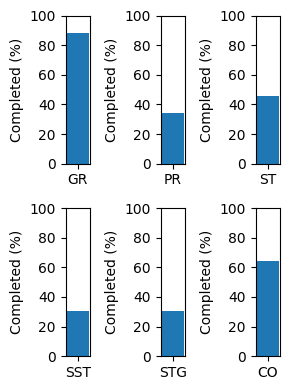

In [2]:
df = pd.read_csv("progress.csv", header=None)
df.columns = [
    "task_id",
    "job_id",
    "fw_id",
    "semantics",
    "tgf_path",
    "apx_path",
    "out_file",
    "parallel",
]
tgf_files = [f[:-4] for f in os.listdir("AFGraphLib/AFs") if f.endswith(".tgf")]
semantics_list = ["GR", "PR", "ST", "SST", "STG", "CO"]
completed_counts = {semantics: 0 for semantics in semantics_list}

for semantics in semantics_list:
    completed_counts[semantics] = (
        df[df["semantics"] == semantics].shape[0] * 100 / len(tgf_files)
    )

fig, axs = plt.subplots(2, 3, figsize=(3, 4))
axs = axs.flatten()
for i, semantics in enumerate(semantics_list):
    axs[i].bar(semantics, completed_counts[semantics])
    axs[i].set_ylim(0, 100)
    axs[i].set_ylabel("Completed (%)", fontsize=10)

plt.tight_layout()
plt.show()

In [3]:
jobs = pd.read_fwf("status.txt", header=None, widths=[20, 11, 11, 11, 20])
jobs = jobs.apply(lambda x: x.str.strip())
not_started_r = range(
    *map(int, jobs.loc[jobs.last_valid_index()][0].split("_")[1][1:-1].split("-"))
)
not_started = set(not_started_r)

print("Not started:", not_started)

completed = jobs[jobs[2] == "COMPLETED"]
completed = set(completed[0].apply(lambda x: int(x.split("_")[1])).tolist())
print("Completed:", completed)

cancelled = jobs[jobs[2].eq("CANCELLED+") & jobs[4].notna()]
cancelled = set(cancelled[0].apply(lambda x: int(x.split("_")[1])).tolist())
print("Cancelled:", cancelled)

other = jobs[~jobs[2].isin(["COMPLETED", "CANCELLED+"])]
other = set(other[0].apply(lambda x: int(x.split("_")[1])).tolist())
print("Other:", other)

assert len(other) == 0
assert not_started.union(completed).union(cancelled) == set(
    range(0, not_started_r.stop)
)

to_run = not_started.union(cancelled)
print("To run:", to_run)

Not started: {2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3137, 3138, 3139, 3140, 3141, 3142, 3143, 3144, 3145, 31

In [4]:
s = (
    ",".join(map(str, sorted(cancelled)))
    + ","
    + str(not_started_r.start)
    + "-"
    + str(not_started_r.stop)
)

with open("to_run.txt", "w") as f:
    f.write(s)

In [5]:
sem_status = []
for sem in ["co", "st", "sst", "gr"]:
    data = pd.read_fwf(f"{sem}.txt", header=None)
    data.columns = [
        "task_id",
        "partition",
        "job_name",
        "user",
        "status",
        "time",
        "nodes",
        "nodelist",
    ]
    data["semantics"] = sem.upper()
    sem_status.append(data)

sem_status = pd.concat(sem_status)

running_counts = sem_status[sem_status["status"] == "R"].groupby("semantics").size()
# running_counts = running_counts.to_dict()
running_couns = running_counts / len(tgf_files) * 100


semantics
CO     0.312565
GR     0.117342
SST    0.073728
ST     0.224299
dtype: float64

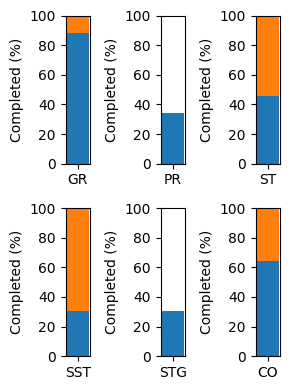

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(3, 4))
axs = axs.flatten()
for i, semantics in enumerate(semantics_list):
    axs[i].bar(semantics, completed_counts[semantics])
    axs[i].bar(
        semantics, running_counts.get(semantics, 0), bottom=completed_counts[semantics]
    )
    axs[i].set_ylim(0, 100)
    axs[i].set_ylabel("Completed (%)", fontsize=10)

plt.tight_layout()
plt.show()